# Model Selection

## Best Subset Selection

In [1]:
library(ISLR)
# Baseball Database of baseball players
summary(Hitters)

     AtBat            Hits         HmRun            Runs       
 Min.   : 16.0   Min.   :  1   Min.   : 0.00   Min.   :  0.00  
 1st Qu.:255.2   1st Qu.: 64   1st Qu.: 4.00   1st Qu.: 30.25  
 Median :379.5   Median : 96   Median : 8.00   Median : 48.00  
 Mean   :380.9   Mean   :101   Mean   :10.77   Mean   : 50.91  
 3rd Qu.:512.0   3rd Qu.:137   3rd Qu.:16.00   3rd Qu.: 69.00  
 Max.   :687.0   Max.   :238   Max.   :40.00   Max.   :130.00  
                                                               
      RBI             Walks            Years            CAtBat       
 Min.   :  0.00   Min.   :  0.00   Min.   : 1.000   Min.   :   19.0  
 1st Qu.: 28.00   1st Qu.: 22.00   1st Qu.: 4.000   1st Qu.:  816.8  
 Median : 44.00   Median : 35.00   Median : 6.000   Median : 1928.0  
 Mean   : 48.03   Mean   : 38.74   Mean   : 7.444   Mean   : 2648.7  
 3rd Qu.: 64.75   3rd Qu.: 53.00   3rd Qu.:11.000   3rd Qu.: 3924.2  
 Max.   :121.00   Max.   :105.00   Max.   :24.000   Max.   :14053.0 

We start by removing the missing values in `Salary`, which is the variable we try to predict. 

In [2]:
Hitters = na.omit(Hitters)
# Validating there are no missing values in Hitters
with(Hitters, sum(is.na(Salary)))

[1] 0

## Best Subset Regression

In [44]:
library(leaps)
regfit.full = regsubsets(Salary ~ ., data=Hitters)
summary(regfit.full)$outmat

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,LeagueN,DivisionW,PutOuts,Assists,Errors,NewLeagueN
1 ( 1 ),,,,,,,,,,,,*,,,,,,,
2 ( 1 ),,*,,,,,,,,,,*,,,,,,,
3 ( 1 ),,*,,,,,,,,,,*,,,,*,,,
4 ( 1 ),,*,,,,,,,,,,*,,,*,*,,,
5 ( 1 ),*,*,,,,,,,,,,*,,,*,*,,,
6 ( 1 ),*,*,,,,*,,,,,,*,,,*,*,,,
7 ( 1 ),,*,,,,*,,*,*,*,,,,,*,*,,,
8 ( 1 ),*,*,,,,*,,,,*,*,,*,,*,*,,,


In [45]:
library(leaps)
regfit.full = regsubsets(Salary ~ ., data=Hitters, nvmax=19)
reg.summary = summary(regfit.full)
reg.summary$outmat

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,LeagueN,DivisionW,PutOuts,Assists,Errors,NewLeagueN
1 ( 1 ),,,,,,,,,,,,*,,,,,,,
2 ( 1 ),,*,,,,,,,,,,*,,,,,,,
3 ( 1 ),,*,,,,,,,,,,*,,,,*,,,
4 ( 1 ),,*,,,,,,,,,,*,,,*,*,,,
5 ( 1 ),*,*,,,,,,,,,,*,,,*,*,,,
6 ( 1 ),*,*,,,,*,,,,,,*,,,*,*,,,
7 ( 1 ),,*,,,,*,,*,*,*,,,,,*,*,,,
8 ( 1 ),*,*,,,,*,,,,*,*,,*,,*,*,,,
9 ( 1 ),*,*,,,,*,,*,,,*,*,*,,*,*,,,
10 ( 1 ),*,*,,,,*,,*,,,*,*,*,,*,*,*,,


[1] 10


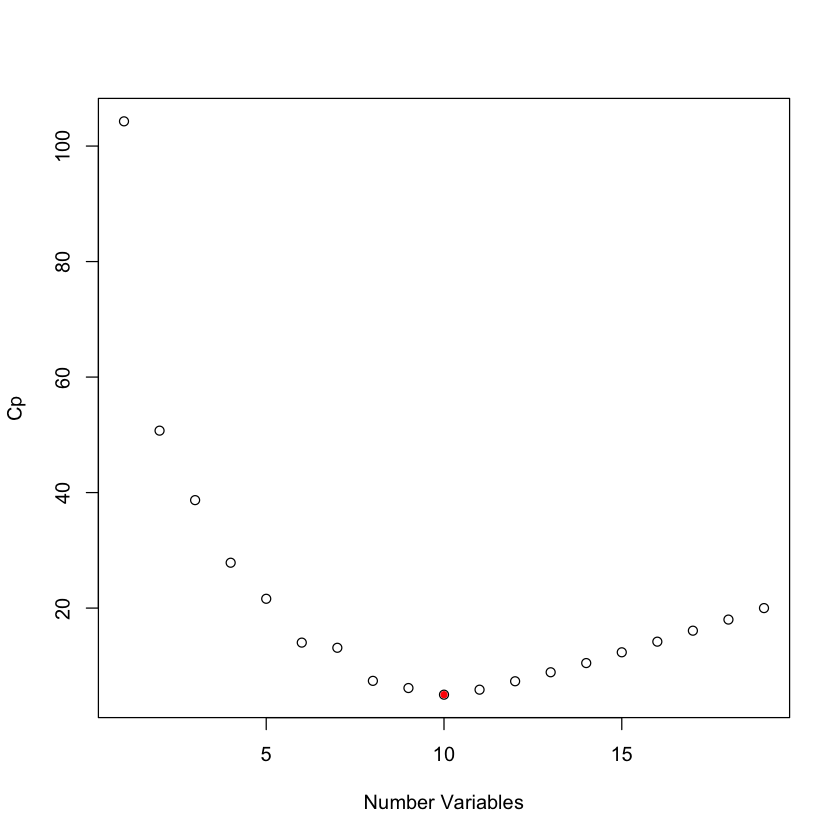

In [20]:
# Index where the minimum value for Cp occurs
where_min_cp = which.min(reg.summary$cp)
print(where_min_cp)
# Plotting the Cp component
plot(reg.summary$cp, xlab="Number Variables", ylab="Cp")
# Plotting as a red dot where the minimum value Cp occurs
points(where_min_cp, reg.summary$cp[where_min_cp], pch=20, col="red")

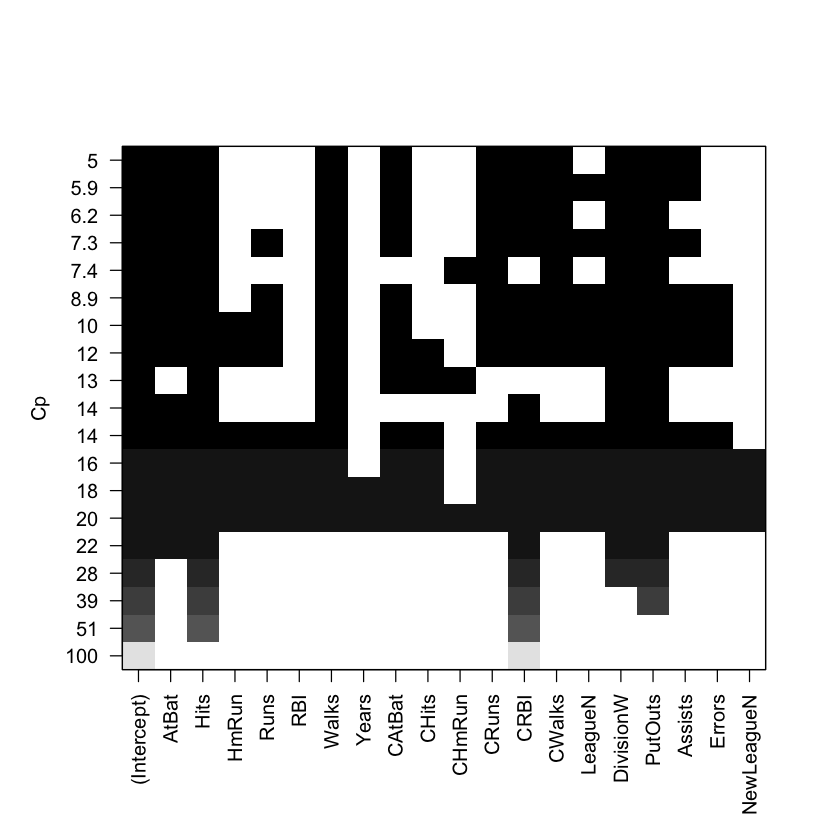

In [16]:
# For each value of Cp, black squares indicate that the 
# variable is in; out squares indicate that the variable is
# out
plot(regfit.full, scale="Cp")

In [17]:
# Return the coeficients for model index number 10
coef(regfit.full, 10)

(Intercept)        AtBat         Hits        Walks       CAtBat        CRuns 
 162.5354420   -2.1686501    6.9180175    5.7732246   -0.1300798    1.4082490 
        CRBI       CWalks    DivisionW      PutOuts      Assists 
   0.7743122   -0.8308264 -112.3800575    0.2973726    0.2831680

## Forward Stepwise Selection

In [34]:
regfit.fwd = regsubsets(Salary ~ ., data=Hitters, nvmax=19, method="forward")
summary(regfit.fwd)$outmat

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,LeagueN,DivisionW,PutOuts,Assists,Errors,NewLeagueN
1 ( 1 ),,,,,,,,,,,,*,,,,,,,
2 ( 1 ),,*,,,,,,,,,,*,,,,,,,
3 ( 1 ),,*,,,,,,,,,,*,,,,*,,,
4 ( 1 ),,*,,,,,,,,,,*,,,*,*,,,
5 ( 1 ),*,*,,,,,,,,,,*,,,*,*,,,
6 ( 1 ),*,*,,,,*,,,,,,*,,,*,*,,,
7 ( 1 ),*,*,,,,*,,,,,,*,*,,*,*,,,
8 ( 1 ),*,*,,,,*,,,,,*,*,*,,*,*,,,
9 ( 1 ),*,*,,,,*,,*,,,*,*,*,,*,*,,,
10 ( 1 ),*,*,,,,*,,*,,,*,*,*,,*,*,*,,


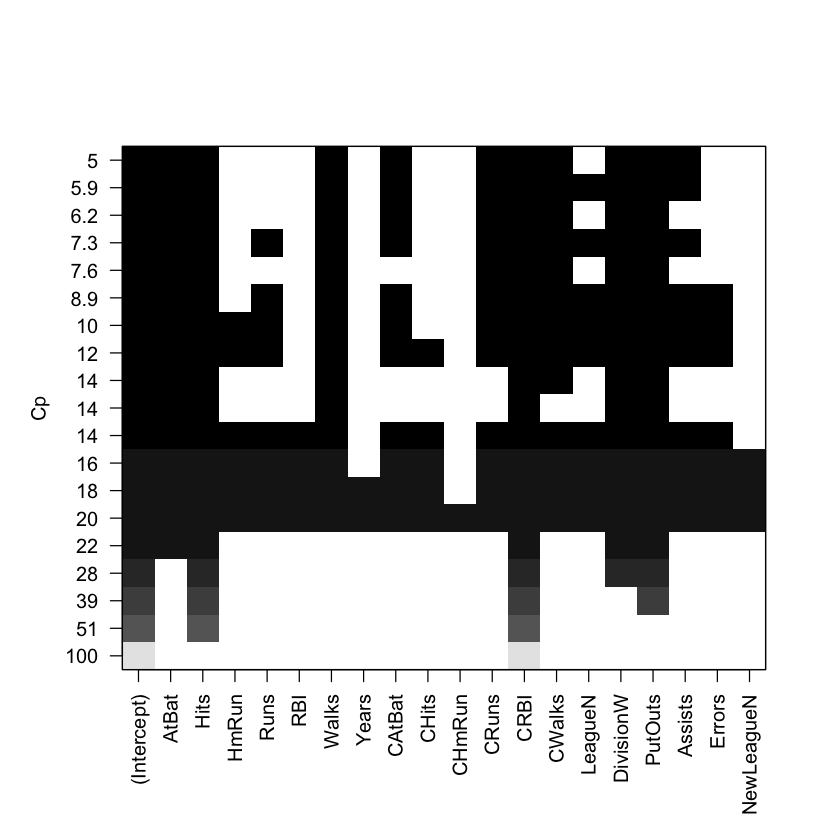

In [39]:
plot(regfit.fwd, scale="Cp")

## Model Selection Using a Validation Set

In [43]:
"Dim. Hitters:"
dim(Hitters)
set.seed(1)

# selecting 180 elements out of 263 (~68.44%)
train = sample(seq(263), 180, replace=F)

[1] "Dim. Hitters:"

[1] 263  20

[1]  70  98 150 237  53 232 243 170 161  16 259  45 173  97 192 124 178 245
 [19]  94 190 228  52 158  31  64  92   4  91 205  80 113 140 115  43 244 153
 [37] 181  25 163  93 184 144 174 122 117 251   6 104 241 149 102 183 224 242
 [55]  15  21  66 107 136  83 186  60 211  67 130 210  95 151  17 256 207 162
 [73] 200 239 236 168 249  73 222 177 234 199 203  59 235  37 126  22 230 226
 [91]  42  11 110 214 132 134  77  69 188 100 206  58  44 159 101  34 208  75
[109] 185 201 261 112  54  65  23   2 106 254 257 154 142  71 166 221 105  63
[127] 143  29 240 212 167 172   5  84 120 133  72 191 248 138 182  74 179 135
[145]  87 196 157 119  13  99 263 125 247  50  55  20  57   8  30 194 139 238
[163]  46  78  88  41   7  33 141  32 180 164 213  36 215  79 225 229 198  76